Source: 
ISLR : Chapter 8 : Tree-Based Models\
StatQuest :\
https://www.youtube.com/watch?v=g9c66TUylZ4 
\
https://www.dcc.fc.up.pt/~ltorgo/PhD/

# Tree Versus Linear Models

Regression and classification trees have a very differnet flavour from the more classical approaches for regression and classification studied earlier. 

Linear Regression assumes a model of the form :     

\begin{align}
f(X) = \beta_0 + ∑_{j=1}^p X_j \beta_j
\end{align}

whereas regression tree assumes a model of the form 

\begin{align}
f(X) = ∑_{m=1}^M c_m .1_{X\in R_m}
\end{align}

where $R_1,\ldots,R_M$ represent a partition of feature space. 

Which model is better ? 

- It depends on the problem at hand. If the relationship between the features and the response is well approaximated by a linear model, thenan approach such as linear regression will likely work well, and will outperform a method as a regression tree. 

- If instead there is a highly non-linear and complex relationship between the features and the response, then the decision trees may outperform classical approaches.


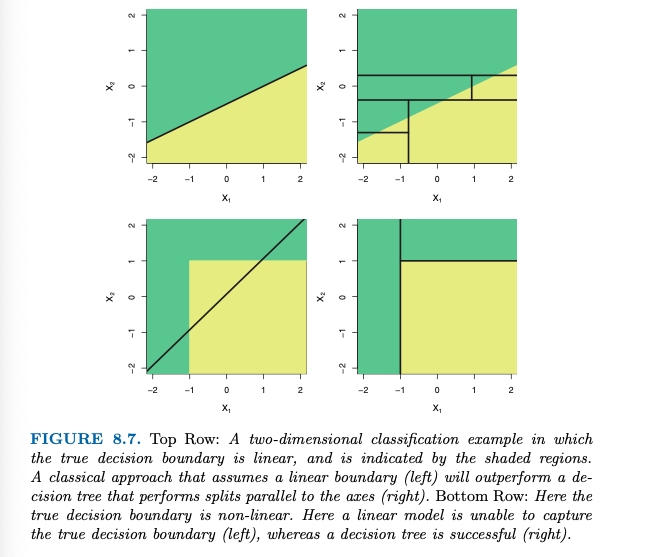

Tree-based regression models are known for their simplicity and efficiency when dealing with domains with larger number ofvariables and cases. Regression trees are obtained using a fast divide and conquer greedy algorithm that recursively partitions thegiven training data into smaller subsets.

A regression tree can be seen as a kind of addition model of the form 

$m(x) = ∑_{i=1}^l k_i × I(x\in D_i) \tag{1}$

where 

$k_i$ are constants;\
$I(.)$ is an indicator function returning $1$ if its argument is true and $0$ otherwise.;\
$D_i$ are disjoin partitions of the training data $D$ such taht $∪_{i=1}^lD_i = D$ and  $∩_{i=1}^l D_i = Φ$.

Models of this type are sometimes called *piecewise constant regression models* as they partition he predictior space $χ$ in a set of regions and fit a constant value within each region.

**Regression trees are constructed using a recursive partitioning (RP) algorithm.**

The algorithm builds a tree by recursively splitting the training sample into smaller subsets.

```
Algorithm - Recursive Partitioning Algorithm
------------------------------------
Input : A set of n data points {<xi,yi>} , i = 1,...,n
Output : A regression tree
-----------------------------------
IF termination criteria Then
  Create Leaf Node and assign it a Constant value
  Return Leaf Node
ELSE
  Find Best Splitting Test s*
  Create Node t with s*
  Left_branch(t) =RecursivepartitioningAlgorithm({<xi,yi>:xi -> s*})
  Right_branch(t) =RecursivepartitioningAlgorithm({<xi,yi>:xi -/> s*})
  Retrun Node t

ENDIF
```
The algorithm has three main components: 

-  way to select a split test( the splitting rule)
- A rule to determine when a tree node is terminal ( termination criterion)
- A rule for assigning a value to each terminal node

## <font color='blue'>Least Squares Regression Trees</font>

The most common method for building a regression model based on a sample of an unknown regression surface consists of trying to obtain the model parameters that minimisr the least squares error criterion.
\
\
$\frac{1}{n}∑_i^n (y_i - r(\beta,x_i))^2$

where,\
$n$ is the sample size;\
$<x_i,y_i>$ is a data point;\
$r(β,x_i)$ is the prediction of the regression model $r(β,x)$ for the case $<x_i,y_i>$


The following theorem holds for the LS minimisation criterion: 

**Theorem** : *The constant $k$ that minimises the expected value of the squared error is the mean value of the target variable*.

Based on this theorem the constant that should be assigned to the leaves of a regression tree obtained using the least squares criterion, is the average of the target values of the cases within each leaf $l$:

\begin{align}
k_l = \frac{1}{nl} ∑_{D_l} y_i \tag{3}
\end{align}

where,\
$n_l$ is the cardinality of the set $D_l$ containing the cases in leaf $l ( \text{i.e } n_l = D_l)$ 


With respect to the splitting rule we restrict the description to the case of binary trees. 

Each inner node of these trees has two descendent nodes. These inner nodes split the training instances in two subsets depending on the result of a test on one of the input variables. 

Cases satisfing the test follow to the left branch while others go to the right branch. The split test is chosen with the objective of improving the fitting error of the resulting tree. 

Any path from the root node to a node $t$ corresponds to a partition $D_t$ of the input cases. 

**Assuming the constant obtained with equation $(3)$, resulting from the application of the least squares error criterion, we define the fitting error of a node $t$ as the average of the squared differences between the $Y$ values of the instances in the node and the node constant $k_t$.**
\
\
$Err(t) = \frac{1}{n_t} ∑_{D_t} (y_i - k_t)^2$
\
\
where $k$ is defined in equation $(3)$

Furthernode, **we define the error of a tree $T$ as a weighted average of the error in its leaves:**
\
\
$Err(T) = ∑_{l \in T} P(l) Err(l) = ∑_{l\in T} \frac{n_l}{n} × \frac{1}{n_l} ∑_{D_t} (y_i - k_t)^2 = \frac{1}{n} ∑_{l \in T} ∑_{D_t} (y_i - k_t)^2$
\
\
where,

$P(l)$ is the probability of a case falling into leaf $l$;\
$n$ is the total number of training cases;\
$n_l$ is the number of cases in leaf $l$;\
$T$ is the set of leaves of the tree T.

A binary split divided a set of cases in two. 

** The goal of the splitting rule is to choose the split that maximises the decrease in the error of the tree resulting from this dividion**. 

We define the error of a split $s$ as the weighted average of the errors of the resulting sub-nodes.

$Err(s,t) = \frac{n_{t_l}}{n_t} × Err(t_l) + \frac{n_{t_r}}{n_t} × Err(t_r)$

where 
$t_L$ is the left child node of $t$ defining a partition $D_{t_{L}}$ that contains the set of cases$\{<x_i,y_i> \in D_t : x_i → S\}$ and $n_{t_{L}}$  the cardinal of this set

$t_R$ is the left child node of $t$ defining a partition $D_{t_{R}}$ that contains the set of cases $\{<x_i,y_i> \in D_t : x_i  !→ s\}$ and $n_{t_{R}}$  the cardinal of this set 



# Process of building a Regression Tree 

Roughly speaking, there are two steps :       
1. We divide the predictor space - that is, the set of possible values for $X_1,X_2,\ldots,X_p$ into $J$ distinct and non-overlapping regions, $R_1,R_2,\ldots,R_j$.

2. For every observation that falls into the region $R_j$, we make the same prediction, which is simply the mean of the response values for the training observation in $R_j$.

For instance, suppose that in Step $1$ we obtain two regions, $R_1$ and $R_2$, and that the response mean of the training observations in the first region is $10$, while the response mean of the training observations in the second region is $20$. Then for a given observation $X =x$, $x \in R_1$ we will predict value of $10$, and if $x \in R_2$ we will predict a value of $20$.

<font color='blue'>How do we construct the regions $R_1,\ldots,R_j$?</font>

In theory, the regions could have any shape. However, we choose to divide the predictor space into high-dimensional rectangles, or *boxes*,for simplicity and for ease of interpretation of the resulting predictive model. The goal is to find boxes $R_1,\ldots,R_j$ that minimizes the $RSS$, given by 

\begin{align}
∑_{j=1}^J∑_{i \in R_j} (y_i - \hat{y}_{R_j})^2
\end{align}
$y_{R_j}$ : Mean response for the training observations within the $j$th box. 

Unfortunately, it is computationally infeasible to consider every possible partition of the feature space into $J$ boxes. 

For this reason, we take a *top-down,greedy* approach that is known as *recursive binary splitting*.

- The approach id top-down because it begins at the top of the tree ( at which point all observations belong to a single regon) 
- Then successviely splits the predictor space; each split is indicated via two new brances further down on the tree.
- It is greedy because at each step of the tree-building process, the *best* split is made at that particular step.

In order to perform recursive binary splitting, we first select the predictor $X_j$, and the cutpoint $s$ such taht splitting the predictor space into the regions $\{X|X_j < s \}$ and $\{X|X_j \geq s\}$ leads to the greatest possible reduction in $RSS$. ( The notation $\{X|X_j < s\}$ menas the *region of predictor space in which $X_j$ takes on a value less than s).* That is, we consider all predictors $X_1,\ldots,X_p$ and all possible values of the cutpoint $s$ for each of the the predictors, and then choose the predictor and cutpoint such that the resulting tree has the lowest $RSS$. 








# Implementation 


In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%cd /content/drive/My\ Drive/colab_notebooks/machine_learning/data/
df = pd.read_csv("Hitters.csv")

/content/drive/My Drive/colab_notebooks/machine_learning/data


In [161]:
print(df.columns)
print(df)
# From the data we, our task will be broadly, to predict the salary, by buiding a regression tree.

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')
            Unnamed: 0  AtBat  Hits  HmRun  ...  Assists  Errors  Salary  NewLeague
0       -Andy Allanson    293    66      1  ...       33      20     NaN          A
1          -Alan Ashby    315    81      7  ...       43      10   475.0          N
2         -Alvin Davis    479   130     18  ...       82      14   480.0          A
3        -Andre Dawson    496   141     20  ...       11       3   500.0          N
4    -Andres Galarraga    321    87     10  ...       40       4    91.5          N
..                 ...    ...   ...    ...  ...      ...     ...     ...        ...
317      -Willie McGee    497   127      7  ...        9       3   700.0          N
318   -Willie Randolph    492   136      5  ...      381      20   875.0      

So, we see there are three non-integer column variables, which we can either delete completly or use One-hot encoding to replace the string values, with numerals, essentially doing the same job. 

In [162]:
print("Division Unique Values:",df.Division.unique())
print("League Unique Values:",df.League.unique())
print("NewLeague Unique Values:",df.NewLeague.unique())

Division Unique Values: ['E' 'W']
League Unique Values: ['A' 'N']
NewLeague Unique Values: ['A' 'N']


In [163]:
df= df.replace(to_replace =["A", "N"], value =[1,0])
df = df.replace(to_replace =["E", "W"], value =[1,0])
#df = df.drop('Unnamed: 0', inplace=True, axis=1)

In [164]:
# Checking if there are null values /missing values in the data 
# Frequency of missing values.
df.isna().sum()/(len(df))*100
""" We see that only Salary has missing values, rest have all the data intact, hence we delete the Salaries with missing values"""

' We see that only Salary has missing values, rest have all the data intact, hence we delete the Salaries with missing values'

In [165]:
df = df.dropna()
# Checking again our dataframe for missing values. 
print("missing values in Salary column of the dataframe",df['Salary'].isna().sum()/(len(df))*100)
# So, we have dropped all the missing values. 
# checking again the length of the dataframe
print(df.shape[0])

missing values in Salary column of the dataframe 0.0
263


### <font color='blue'>3. Visualising data .</font>

In [166]:
from scipy.stats import pearsonr
cols = df.columns
df_corr = pd.DataFrame(columns=['Cols', 'corr_score'], index=range(len(cols)))  # creating a dataframe of the correlation scores 
for i in range(1,len(cols)):
  corr, _ = pearsonr(df.iloc[:,i],df.iloc[:,-2])                                # calculating the pearson correlation 
  df_corr.iloc[i,0] = cols[i]
  df_corr.iloc[i,1] = corr

df_corr = df_corr.dropna()
df_corr = df_corr.sort_values(by='corr_score', ascending=False)                 # Sorting in descending order of correlation score. 
print(df_corr)

         Cols corr_score
19     Salary        1.0
12       CRBI   0.566966
11      CRuns   0.562678
9       CHits    0.54891
8      CAtBat   0.526135
10     CHmRun   0.524931
13     CWalks   0.489822
5         RBI   0.449457
6       Walks   0.443867
2        Hits   0.438675
4        Runs   0.419859
7       Years   0.400657
1       AtBat   0.394771
3       HmRun   0.343028
16    PutOuts    0.30048
15   Division   0.192514
17    Assists   0.025436
14     League   0.014282
20  NewLeague   0.002834
18     Errors  -0.005401


We can see from the correlation score, that columns ` [CRBI,CRuns,CHits,CAtBat,ChmRun,CWalks,RBI,Walks,Hits,Runs,Years]` are the top 11 columns having high correlation with the response variable `Salary`. 

We will create a sub-frame with these columns, and see where it leads us. 

In [167]:
sub_df = df[['CRBI','CRuns','CHits','CAtBat','CHmRun','CWalks','RBI','Walks','Hits','Runs','Years','Salary']]
#print(sub_df)
#df_standardized = (sub_df-sub_df.mean())/sub_df.std()
# Taking log of the Salaries, to get uniform scaling in visualization
#sub_df['Salary']= np.log(sub_df['Salary'])
sub_df_std =  (sub_df - np.mean(sub_df,axis=0))/np.std(sub_df,axis=0)
sub_df_std

,CRBI,CRuns,CHits,CAtBat,CHmRun,CWalks,RBI,Walks,Hits,Runs,Years,Salary
1,0.258966,-0.121671,0.174373,0.346791,-0.002920,0.435334,-0.522063,-0.097527,-0.595675,-1.206112,1.397893,-0.135313
2,-0.199590,-0.415105,-0.409892,-0.452865,-0.076054,0.010373,0.794060,1.609373,0.492260,0.441515,-0.901200,-0.124208
3,1.572666,1.412051,1.318174,1.301558,1.898565,0.355654,1.026317,-0.189792,0.736490,0.402286,0.770868,-0.079789
4,-0.881228,-0.947521,-0.960153,-0.990935,-0.697693,-0.862315,-0.367225,-0.512719,-0.462459,-0.617673,-1.110209,-0.987042
5,0.017294,0.422846,0.634985,0.766993,-0.612370,-0.251434,-0.018840,-0.282057,1.358167,0.755349,0.770868,0.475445
...,...,...,...,...,...,...,...,...,...,...,...,...
317,-0.060165,0.053785,0.129549,0.019917,-0.453913,-0.463914,-0.134968,-0.189792,0.425651,0.402286,-0.483183,0.364398
318,0.373605,1.620783,1.219250,1.250292,-0.368590,2.332483,-0.057549,2.439756,0.625476,0.833807,0.979876,0.753063
319,-0.735605,-0.436281,-0.446988,-0.419565,-0.758638,-0.433560,-0.328515,0.502194,0.403449,0.245369,-0.274175,-0.335197
320,0.277556,0.329068,0.208378,0.236810,0.338372,0.272180,0.329546,1.701637,0.803098,1.186870,0.143842,0.941842


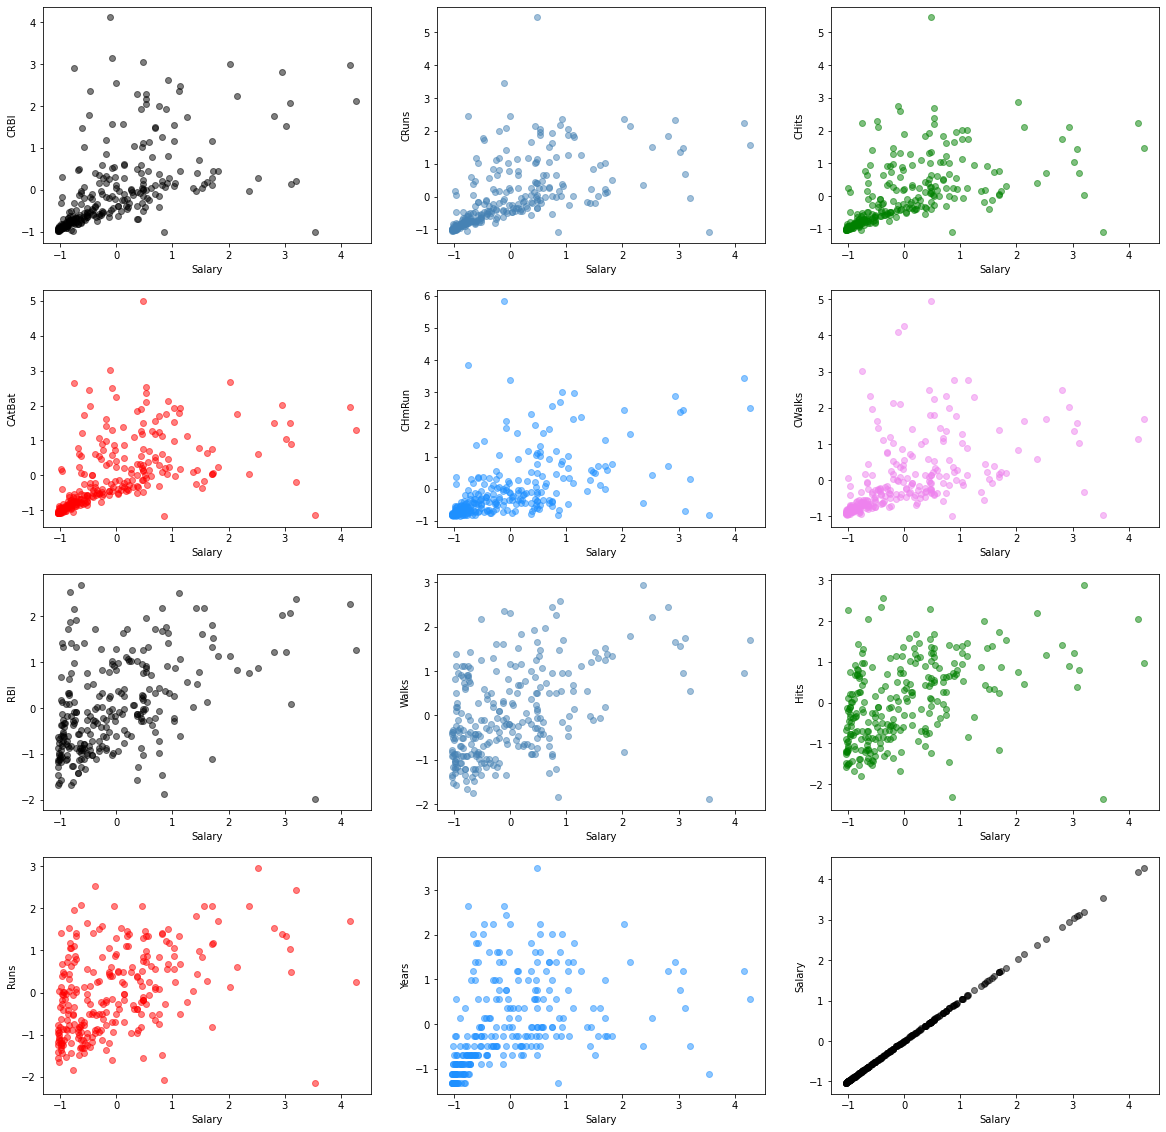

In [168]:
columns = ['CRBI','CRuns','CHits','CAtBat','CHmRun','CWalks','RBI','Walks','Hits','Runs','Years','Salary']
N = 11
colors = ['black','steelblue','green','red','dodgerblue','violet','black','steelblue','green','red','dodgerblue','black']
fig = plt.figure(figsize=(20,20))
axes = fig.subplots(nrows=4, ncols=3)
i = 0
for row in range(4):
    for col in range(3):
        #axes[row,col].hist(df_col[columns[i]],density = 'True',alpha=0.5,
         #histtype='stepfilled', color='steelblue',bins=30) 
        axes[row,col].scatter(sub_df_std[columns[-1]],sub_df_std[columns[i]],color=colors[i],alpha=0.5)
        axes[row,col].set_ylabel(columns[i])
        axes[row,col].set_xlabel('Salary')
        i = i+1
plt.show()

###<font color='blue'>4. Simpe regresion tree, build recursively using a single feature</font>

For our analysis, I am selecting "Years" as the feature determining the level of salary

Before, we go ahead:
Split the data into Train and Test Set. 

1. Train Test Split
2. Create regressondecision tree class
3. Initialize the9 constructor - x,y, node
4. regressionfit(x,y,node)
      make_tree class/method 
       - (dataframe,node)
       - call the make_best_split function 
       based on threshold , do a right or left split.
       base case. when df <= 7: assign mean to the node value.



### Regression Tree Starts here
Basic regression tree, without the logic of maxdepth or pruning. 

In [202]:
sub_df = sub_df_std.sample(frac=1)
train_df = sub_df.iloc[0:210,:]
test_df = sub_df.iloc[210:,:]

In [203]:
# Array implentation
train_arr = np.array(train_df)
col = train_df.columns

In [16]:
class Node:

  def __init__(self):
    self.data = None
    self.feature_index = None
    self.threshold = None
    self.leaf_val = None
    self.left = None
    self.right = None


In [23]:
def leastsquares_error(arr,col):

  n = len(arr)
 
  #Begin splitting logic
  i = 0
  min_err = 99999999999
  while i < n-1:

    split = arr[i,0]
    left_split = arr[arr[:,0] <= split]
    right_split = arr[arr[:,0] > split]

    # length of the splits 
    nl = len(left_split)
    nr = len(right_split)

    kl = np.mean(left_split,axis=0)[1]
    kr = np.mean(right_split,axis=0)[1]
    
    delta_err = np.sum(((left_split[:,-1] - kl)**2)) + np.sum(((right_split[:,-1] - kr)**2))

    if delta_err < min_err:
      min_err = delta_err
      threshold = split
      
    i +=1

  return min_err, threshold

In [24]:
def best_split(arr,col):

  m = arr.shape[1]
  split_err = []
  split_threshold = []

  for i in range(0,m-1):
    min_err,threshold = leastsquares_error(arr[:,[i,-1]],col[[i,-1]])
    split_err.append(min_err)
    split_threshold.append(threshold)

  best_split_index = np.argmin(split_err)
  best_threshold = split_threshold[best_split_index]

  return best_split_index,best_threshold

In [84]:
def build_tree(arr,col,n_node):

  # base case
  n = len(arr)
  n_node.data = arr

  if n <= 10:
    mean = np.mean(arr[:,-1],axis=0)
    n_node.mean_value = mean
    return n_node
  
  # recurring tree build 
  best_split_index,best_threshold  = best_split(arr,col)
  n_node.feature_index = col[best_split_index]
  n_node.threshold = best_threshold

  # Split into two brances
  left_arr  = arr[arr[:,best_split_index] <= best_threshold]
  right_arr = arr[arr[:,best_split_index] > best_threshold]

  # grow tree
  left_node = Node()
  right_node = Node()
  n_node.left = build_tree(left_arr,col,left_node)
  n_node.right = build_tree(right_arr,col,right_node)

  return n_node

In [204]:
n_node = Node()
#leastsquares_error(train_arr[:,[0,-1]],col[[0,-1]],eps)
#best_split_index,best_threshold = best_split(train_arr,col,eps)
noden = build_tree(train_arr,col,n_node)

In [177]:
def predict(arr,cols,noden):

  head = noden
  index = head.feature_index
  threshold = head.threshold

  value = arr[index]
 
  if value <= threshold:

    if head.left.feature_index is not None:
      pred = predict(arr,cols,head.left)
    else:
      return np.mean(head.data[:,-1])
  
  elif value > threshold:
  
    if head.right.feature_index is not None:
      pred = predict(arr,cols,head.right)
    else:
      return np.mean(head.data[:-1])
      
  return pred

In [207]:

test_arr = test_df

pred_arr= []
for i in range(0,len(test_arr)):
  entry = test_arr.iloc[i,:]
  pred = predict(entry,col,noden)
  pred_arr.append(pred)


y = test_df.iloc[:,-1]

# Prediction Accuracy 
pred_accuracy = 1/len(test_arr)* np.sum((y - pred_arr)**2)

print("pred_accuracy",pred_accuracy)
print("root mean squared error",np.sqrt(pred_accuracy))

pred_accuracy 0.4716724046829869
root mean squared error 0.6867841034000327


In [206]:
# import the regressor
""" Testing the same dataset, with Sklearn library"""
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
  
clf = DecisionTreeRegressor()
clf.fit(train_df.iloc[:,0:-2], train_df.iloc[:,-1])

predictions = clf.predict(test_df.iloc[:,0:-2])

print(mean_squared_error(y, predictions))
print(np.sqrt(mean_squared_error(y, predictions)))

0.5885209436128687
0.7671511869331029


#Rough

In [128]:
print("df_left",len(df_left))
print("df_right",len(df_right))

df_left 93
df_right 117


In [131]:
s = best_split(df_right,columns)
index,threshold = s.func_best_split()
df_left_1, df_right_1,index_1 = s.make_df()
print("df_left_1",len(df_left_1))
print("df_right_1",len(df_right_1))

self.columns Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
colnames[self.split_index] RBI
self.df Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
self.columns[remove_index] RBI
df_left_1 38
df_right_1 79


In [136]:
s = best_split(df_right_1,columns)
index,threshold = s.func_best_split()
df_left_2, df_right_2,index_1 = s.make_df()
print("df_left_2",len(df_left_2))
print("df_right_2",len(df_right_2))

self.columns Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
colnames[self.split_index] RBI
self.df Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
self.columns[remove_index] RBI
df_left_2 70
df_right_2 9


In [125]:
class best_split:

  def __init__(self,df,colums):
    self.df = df
    self.split_index = None
    self.threshold = None
    self.columns = columns
   
  def func_best_split(self):
    
    feature_rss = []
    split_num = []

    for i in range(0,self.df.shape[1]-1):

      col_df = self.df.iloc[:,[i,-1]]
      rss,val = self._min_rss(col_df)
      feature_rss.append(rss)
      split_num.append(val)

    self.split_index = np.argmin(feature_rss)
    self.threshold = split_num[self.split_index]

    return self.split_index,self.threshold

  ############################################################################
  # Function to calculate the residual sum of squares for each feature in the dataframe.
  ############################################################################
  def _min_rss(self,col_df):

    col_df.insert(loc=2, column='pred', value=0)
    n = col_df.shape[0]
    col_name = col_df.columns
    min_rss = 9999999999999

    for i in range(0,col_df.shape[0]):
      
      split = col_df.iloc[i,0]
      
      # divide the dataset into 2 halfs, based on the split value, and calculate mean of the salary of the players.
  
      pred_left =  col_df[col_df[col_name[0]] <= split]
      pred_right = col_df[col_df[col_name[0]] > split]

      pred_left_mean = np.mean(pred_left)[1]
      pred_right_mean = np.mean(pred_right)[1]

      pred_left.iloc[:,-1] = pred_left_mean
      pred_right.iloc[:,-1] = pred_right_mean
    
      # update the pred column of the col_df dataframe.
     
      rss = (1/n)*(np.sum((pred_left.iloc[:,1]-pred_left.iloc[:,-1])**2) + np.sum((pred_right.iloc[:,1]-pred_right.iloc[:,-1])**2))
      if rss < min_rss: 
        min_rss = rss 
        threshold = split

    return min_rss,split

  ############################################################################
  #create two datasets,based on the threshold and best split feature.
  ############################################################################

  def make_df(self):
      
    colnames = self.df.columns
    print("self.columns",self.columns)
    print("colnames[self.split_index]",colnames[self.split_index])
    for i in range(len(self.columns)):    
       if colnames[self.split_index] == self.columns[i]:
         remove_index = i

    left_df = self.df[self.df[colnames[self.split_index]] <= self.threshold]
    right_df = self.df[self.df[colnames[self.split_index]] > self.threshold]
    print("self.df",self.df.columns)
    print("self.columns[remove_index]",self.columns[remove_index])

    return left_df, right_df, remove_index


In [137]:
s = best_split(df_left_2,columns)
index,threshold = s.func_best_split()
df_left_3, df_right_3,index_1 = s.make_df()
print("df_left_3",len(df_left_3))
print("df_right_2",len(df_right_3))

self.columns Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
colnames[self.split_index] Walks
self.df Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
self.columns[remove_index] Walks
df_left_3 69
df_right_2 1


In [138]:
s = best_split(df_left_3,columns)
index,threshold = s.func_best_split()
df_left_4, df_right_4,index_1 = s.make_df()
print("df_left_4",len(df_left_4))
print("df_right_4",len(df_right_4))

self.columns Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
colnames[self.split_index] RBI
self.df Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
self.columns[remove_index] RBI
df_left_4 69
df_right_4 0


In [ ]:
print("df_left",df_left_1)
print("df_right",df_right_1)

df_left          CRBI     CRuns     CHits  ...      Runs     Years    Salary
217 -1.002063 -1.074575 -1.102355  ... -2.147612 -1.110209  3.534416
295 -1.014457 -1.086676 -1.110083  ... -2.069154 -1.319217  0.853005
135 -0.909113 -0.917270 -0.923057  ... -1.245341 -0.901200 -0.990374
261 -0.983473 -1.044324 -1.040528  ... -1.833779 -0.692192 -0.768280
212 -0.980375 -1.017098 -1.032799  ... -1.166882 -1.319217 -1.039234
162 -0.992768 -1.038274 -1.048256  ... -1.637633 -0.901200 -1.023688
17  -0.952490 -0.896095 -0.958607  ... -1.206112 -0.483183 -0.801594
63  -0.809966 -0.735765 -0.791674  ... -0.931507 -0.692192 -0.690547

[8 rows x 12 columns]
df_right          CRBI     CRuns     CHits  ...      Runs     Years    Salary
244 -0.686031 -0.784166 -0.896780  ...  0.794578 -0.901200 -0.712756
87  -0.806867 -0.908195 -0.941605  ... -0.421527 -1.110209 -0.945955
201 -0.946293 -1.011048 -1.032799  ... -1.088424 -1.319217 -1.023688
51  -0.924605 -0.995923 -1.025071  ... -0.970736 -1.110209 -1.0

In [ ]:
s = best_split(df_right_1,columns)
index,threshold = s.func_best_split()
df_left_2, df_right_2,index_2 = s.make_df()

self.columns Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
colnames[self.split_index] CRuns
self.df Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
self.columns[remove_index] CRuns


In [ ]:
print("df_left",df_left_2)
print("df_right",df_right_2)

df_left          CRBI     CRuns     CHits  ...      Runs     Years    Salary
201 -0.946293 -1.011048 -1.032799  ... -1.088424 -1.319217 -1.023688
51  -0.924605 -0.995923 -1.025071  ... -0.970736 -1.110209 -1.034792
213 -0.912211 -1.032224 -0.998795  ... -1.441487 -0.901200 -0.968164
8   -0.918408 -0.995923 -0.983338  ... -1.127653 -1.110209 -1.023688
176 -0.952490 -0.989873 -1.026617  ... -0.813819 -1.319217 -0.998147
239 -0.924605 -0.968697 -0.989521  ... -0.853049 -0.483183 -0.901536
273 -0.927703 -1.011048 -0.992612  ... -1.363028 -0.901200 -0.990374
92  -0.915309 -0.986848 -0.995703  ... -0.774590 -1.319217 -1.034792
152 -0.906014 -0.992898 -0.983338  ... -0.853049 -1.319217 -0.945955
259 -0.955588 -0.995923 -1.011160  ... -0.892278 -1.319217 -1.034792
40  -0.933900 -1.032224 -1.038982  ... -1.559174 -1.110209 -1.040345
37  -0.933900 -0.989873 -0.995703  ... -1.206112 -1.110209 -0.990374
109 -0.967981 -1.035249 -1.037437  ... -1.402258 -1.319217 -1.034792
188 -0.943195 -0.998948 -1

In [ ]:
s = best_split(df_left_2,columns)
index,threshold = s.func_best_split()
df_left_3, df_right3,index_3 = s.make_df()

self.columns Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
colnames[self.split_index] Years
self.df Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
self.columns[remove_index] Years


In [ ]:
s = best_split(df_left_3,columns)
index,threshold = s.func_best_split()
df_left_3, df_right3,index_3 = s.make_df()

self.columns Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
colnames[self.split_index] CRBI
self.df Index(['CRBI', 'CRuns', 'CHits', 'CAtBat', 'CHmRun', 'CWalks', 'RBI', 'Walks',
       'Hits', 'Runs', 'Years', 'Salary'],
      dtype='object')
self.columns[remove_index] CRBI


In [ ]:
print("df_left",df_left_3)
print("df_right",df_right3)

df_left        Salary
204   780.000
23    600.000
102   375.000
189  1183.333
60     90.000
..        ...
21    115.000
260   875.000
95    595.000
92     70.000
96   1861.460

[140 rows x 1 columns]
df_right      Salary
98    300.0
309   160.0


In [ ]:
class node:

  def __init__(self):
    self.threshold = None
    self.feature_index = None
    self.mean_value = None
    self.left = None
    self.right = None

In [ ]:
class grow_tree:

  def __init__(self,df,_node):
    self.df = df
    self.node = _node
  
  def _buildtree(self,df,node):
    
    # Base case, when number of rows in the dataframe is less than 7.
    print("we are here")
    if self.df.shape[0] <= 7:
      self.node.mean_value = np.mean(self.df[:,-1]) 
    else:

      s = best_split(self.df)
      index,threshold = s.func_best_split()
      df_left, df_right = s.make_df()
      self.node.threshold = threshold
      self.node.feature_index = index
      self.node.left = node()
      self.node.right = node()
      print(self.node.threshold)
      print(self.node.mean_value)
      _buildtree(df_left,self.node.left)
      _buildtree(df_right,self.node.right)
      

In [ ]:
def _buildtree(df,noode):
    
    # Base case, when number of rows in the dataframe is less than 7.
    print("we are here")
    print("df",df.shape)
    if df.shape[0] <= 7:
      noode.mean_value = np.mean(df[:,-1]) 
      return noode
    else:

      s = best_split(df)
      index,threshold = s.func_best_split()
      print("index",index,"threshold",threshold)
      df_left, df_right = s.make_df()
      print(df_left.shape,df_right.shape)
      noode.threshold = threshold
      noode.feature_index = index
      l_node = node()
      r_node = node()
      #n.left  = _buildtree(df_left,l_node)
      #n.right = _buildtree(df_right,r_node)   
   
    return df_left, df_right
      

In [ ]:
# First node 
nnode = node()
df_l0, df_r0 = _buildtree(train_df,nnode)

we are here
df (210, 12)
index 2 threshold 298
(68, 12) (142, 12)


In [ ]:
# second left node 
nnode = node()
df_l1, df_r1 = _buildtree(df_l0,nnode)

we are here
df (68, 12)
index 0 threshold 123
(64, 12) (4, 12)


In [ ]:
# third left node 
nnode = node()
df_l2, df_r2 = _buildtree(df_l1.iloc[:,2:],nnode)

we are here
df (64, 10)
index 0 threshold 298
(64, 10) (0, 10)


In [ ]:
nnode_r1 = node()
df_left_1, df_right_1,node_1 = _buildtree(df_,nnode1)

In [ ]:

print(tree)

None


In [ ]:
# The main driving class 
class RegressionDecisionTree:

  def __init__(self,x,y,root):
    self.x = x
    self.y = y
    root = Node()

  def fit_tree(self):
    tree = make_tree(self,root)
  
  def predict(self):
    pred  = eval_tree(x)

  def printtree(self):
    # code to print tree. 


SyntaxError: ignored

In [ ]:
if __name__ == "__main__":

  # split into train and test. 

  # divide the train into train and validation with k-fold cross validation 

  # after getting the return tree, predict on the validation set
  pprint(tree)
  prediction_error
  graph of the residual errors. 
  # check the residual errors # 
  # basically we run our tree for a single variable for all our 11 selected variables, 
  # and recursively keep building the tree, using only one variable. 
  if predict_error < earlier<prediction_error:
    select the best model 





In [ ]:
def best_split(arr):

  # Binary tree model : Splitting the area into 2 .Left child & right child
  left_split  = arr[arr < S]
  right_split = arr[arr >= S]
  
  left_mean = np.mean(left_split - of salary)
  right_mean = np.mean(right_split - of salary)
  
  residuals_1 = 199999999999        # Initialized to a high number 
  for i in range(0,logspace())
    # Calculate the left and right split based on the value,given by the logspace.
    # Calculate the residuals 
    residual_2 = (left_split[:,-1] - left_mean )**2 + 
    (right_split[:,-1] - right_mean)**2
    rss.append(residual_2)
    if residual_2 < residual_1:
      residual_1 = residual_2
    else:
      return S,rss
  return S,rss

Approach learnt from StatQuest :       

### <font color='blue'> Creating regression tree from single variable</font>
1. We will be using Hitters dataset from ISLR datasets. 
2. Select a single predictor from the predictors, and try to build the tree, using only 1 predictor. 
3. Select the best split at each level, based on optimizing the **Residual Sum of Squares**. The split value (S), that is lowest for that stage, must be selected. 
4. Continue down the road, by having a check of rows of subsequent sub-dataset >= 7 or 20, (based on initial number of rows). 

5. Calculate the Residual sum of squares, for all the boxes, created at the end of the tree formation. 
6. If needed repeat the exercise for other features. 

**Broadly dividing our implementation**
1. Loading dataset
2. Data cleaning if any needed
3. Visualizing the dividing the data into train and test split.
4. Selecting the feature, based on which we create our regression tree
5. Calculate the total residual sum of squares at the end of the process. 
6. Test how accurate our prediction is based on test data. 